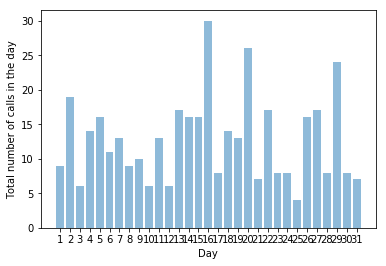

In [34]:
from core.computefeature import ComputeFeatureBase
from core.feature.phone_features.phone_features import PhoneFeatures
from cerebralcortex.cerebralcortex import CerebralCortex
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np


# Initialization
cc = CerebralCortex('/home/md2k/cc_configuration.yml')

# Initialize the feature to be executed
phone_features = PhoneFeatures(cc)

# Get your userid
userid = 'd72be89a-68d7-4ca8-bb97-1cb9be776001'

# Initialize the days for which you need to compute the feature
date_format = '%Y%m%d'

start_date = datetime.strptime('20171201', date_format)
end_date = datetime.strptime('20171231', date_format)

all_days = []
while True:
    all_days.append(start_date.strftime(date_format))
    start_date += timedelta(days = 1)
    if start_date > end_date : break

# Execute the feature computation
#phone_features.process(userid,all_days)

# Access your computation results
# get stream id for a stream
sms_count_stream = cc.get_stream_id(userid, 'org.md2k.data_analysis.feature.phone.call.day.count')

'''
Iterate through stream_ids. One good way is to make use of the version 
information in the metadata to select the desired stream
'''
for count_stream in sms_count_stream:
    streamid = count_stream['identifier']
    count = []
    for day in all_days:
        count_data = cc.get_stream(streamid, userid, day)
        # we expect only 1 data point per day for this particular stream
        sample = count_data.data[0].sample
        count.append(sample)
    
    # Let's plot our computation
    plt.bar(np.arange(len(all_days)), count, align='center', alpha=0.5)
    dates = [datetime.strptime(day, date_format).day for day in all_days]
    plt.xticks(np.arange(len(all_days)), dates)
    plt.ylabel('Total number of calls in the day')
    plt.xlabel('Day')
    plt.show()

